In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/price_data.csv", index_col=0)

# Ensure Date is index
data.set_index("Date", inplace=True)

data.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,71.476607,72.528589,71.223267,72.468269,135480400
2020-01-03,71.696144,72.523731,71.539314,71.763702,146322800
2020-01-06,70.885472,72.374162,70.634539,72.335556,118387200
2020-01-07,72.345212,72.600968,71.775796,71.995361,108872000
2020-01-08,71.698589,73.455103,71.698589,73.153503,132079200


In [26]:
price_column = "Adj Close" if "Adj Close" in data.columns else "Close"

# Ensure numeric
data[price_column] = pd.to_numeric(data[price_column], errors="coerce")
data = data.dropna(subset=[price_column])

# Calculate daily returns
data["returns"] = data[price_column].pct_change()

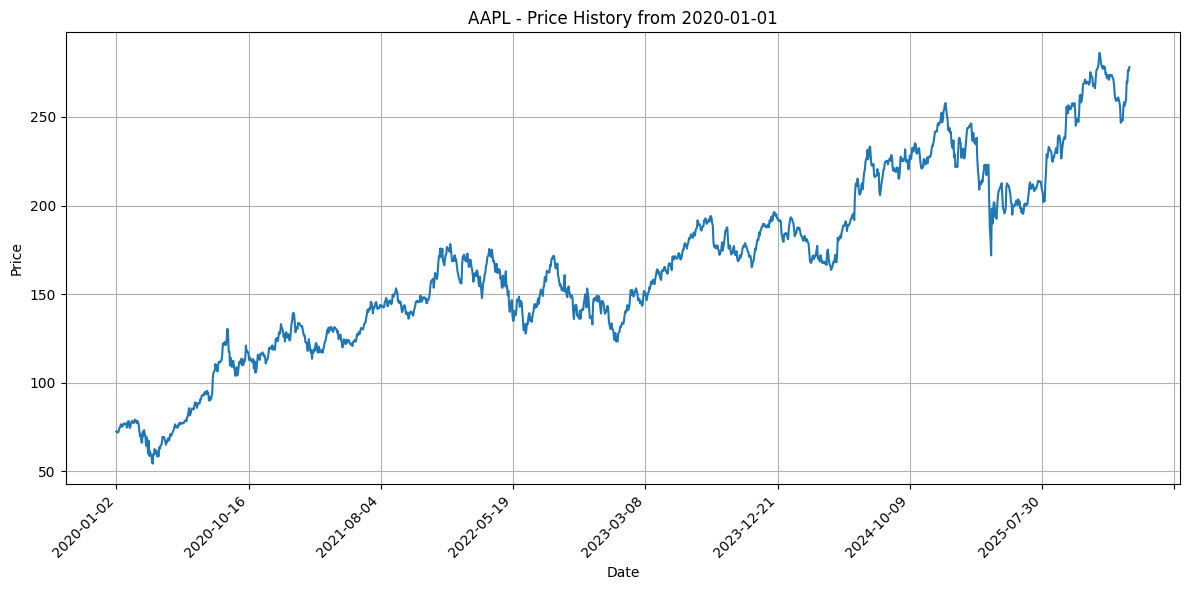

In [ ]:
# Plot Closing Price History
plt.figure(figsize=(12,6))
data[price_column].plot()
plt.title("AAPL: Price History from 2020-01-01")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()  # Adjust layout so labels fit
plt.show()


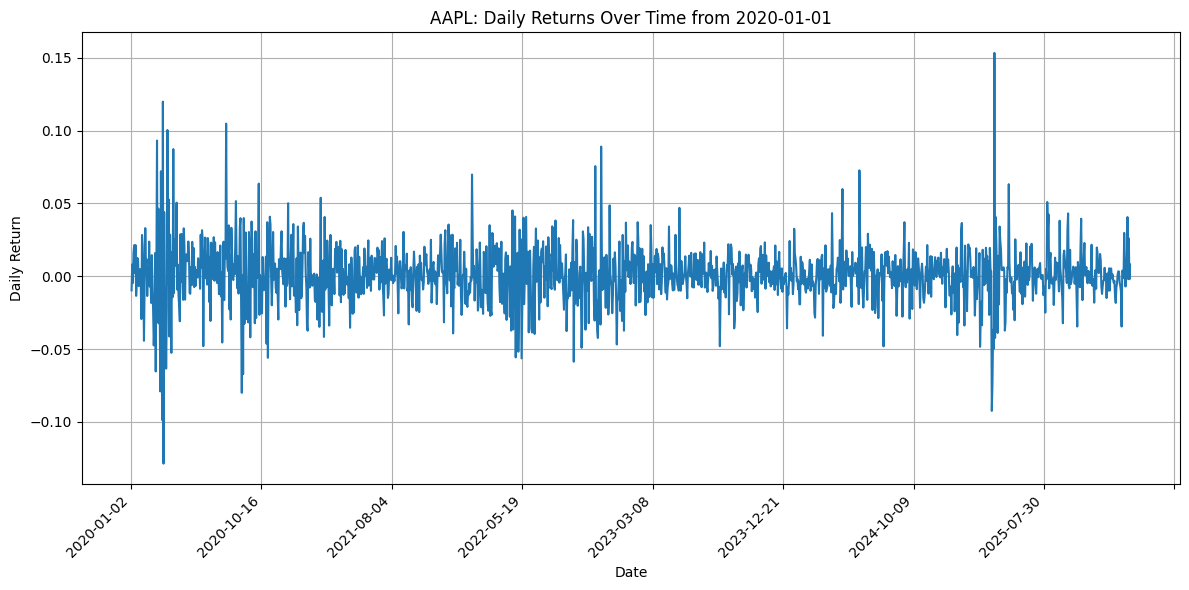

In [30]:
# Plot Returns over Time
plt.figure(figsize=(12,6))
data["returns"].plot()
plt.title("AAPL: Daily Returns Over Time from 2020-01-01")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

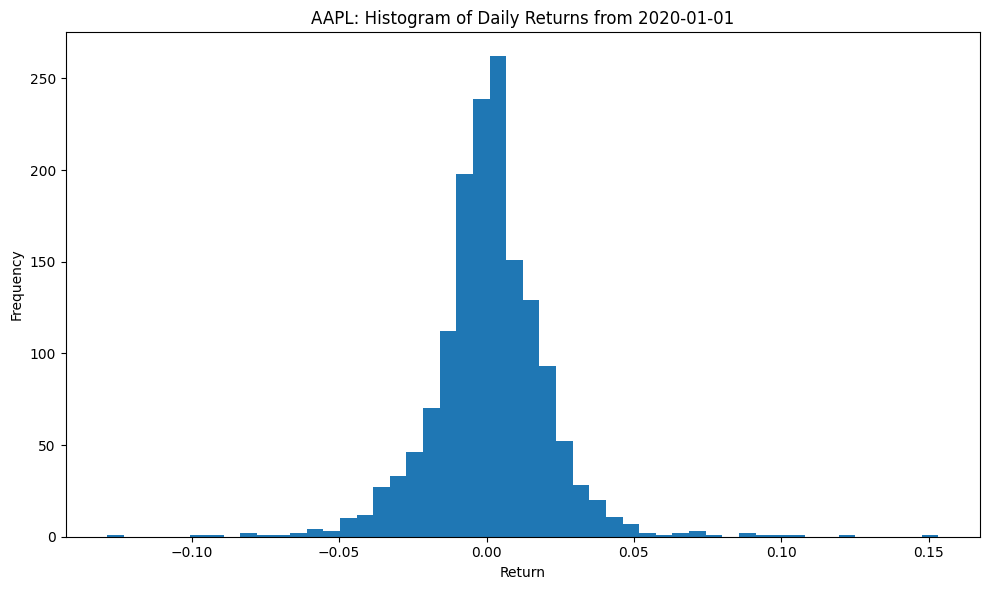

In [31]:
# Plot Histogram of Daily Returns 
plt.figure(figsize=(10,6))
data["returns"].hist(bins=50)
plt.title("AAPL: Histogram of Daily Returns from 2020-01-01")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()